# Human Activity Recognition with Smartphones - 1D CNN Classification

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.12.0


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# 데이터 로드
from google.colab import files

data = pd.read_csv('/content/train.csv')

In [13]:
# 데이터 확인
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [14]:
data.shape

(7352, 563)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [17]:
# 결측치 확인
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [19]:
min(data['Activity'].value_counts())

986

In [20]:
data['Activity'].value_counts() # 제일 작은거 위주로 맞춰서 함.

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [21]:
data['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

(array([ 688.,  627.,  589.,  316.,  651.,  734.,  768.,  693., 1177.,
        1109.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

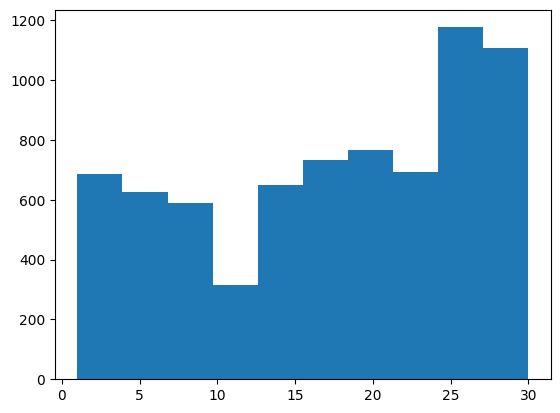

In [22]:
plt.hist(data['subject'])

In [24]:
data['Activity'].value_counts().index # 레이블 뽑기

Index(['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [25]:
data['subject'].value_counts().index

Int64Index([25, 21, 26, 30, 28, 27, 23, 17, 16, 19, 1, 29, 3, 15, 6, 14, 22,
            11, 7, 5, 8],
           dtype='int64')

In [26]:
from itertools import cycle

users = data['subject'].value_counts().index
colors = 'bckgmwry'
u2c = {k:v for (k, v) in zip(users, cycle(colors))}
u2c

{25: 'b',
 21: 'c',
 26: 'k',
 30: 'g',
 28: 'm',
 27: 'w',
 23: 'r',
 17: 'y',
 16: 'b',
 19: 'c',
 1: 'k',
 29: 'g',
 3: 'm',
 15: 'w',
 6: 'r',
 14: 'y',
 22: 'b',
 11: 'c',
 7: 'k',
 5: 'g',
 8: 'm'}

In [27]:
bal_df = pd.DataFrame()
N = min(data['Activity'].value_counts())
for Activity in data['Activity'].value_counts().index:
  mask = (data['Activity'] == Activity)
  sampled_df = data[mask].sample(N)
  bal_df = pd.concat([bal_df, sampled_df])
print(bal_df.shape)
bal_df.head() # 인밸런스 문제는 분류에서 굉장히 유명함. 수를 비슷하게 맞춰준다

(5916, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5960,0.278354,-0.016345,-0.111278,-0.985230,-0.988805,-0.990760,-0.985383,-0.987864,-0.990653,-0.930099,...,-0.950759,0.332895,0.404353,0.222148,0.056738,0.604472,-0.363929,-0.648498,27,LAYING
1236,0.278069,-0.016492,-0.126959,-0.987967,-0.981437,-0.959409,-0.988912,-0.984027,-0.955774,-0.929172,...,-0.865325,0.018536,-0.491528,-0.346965,-0.636118,0.595427,-0.953100,-0.036124,6,LAYING
5559,0.253180,-0.018024,-0.102569,-0.984927,-0.989289,-0.991426,-0.985524,-0.989192,-0.990690,-0.938121,...,-0.720785,-0.165750,0.184675,-0.190654,0.289643,0.704604,-0.503410,-0.494664,26,LAYING
1073,0.273635,-0.016393,-0.105161,-0.987485,-0.981399,-0.989143,-0.988645,-0.983178,-0.987955,-0.933107,...,-0.848520,-0.163994,-0.295247,0.575277,-0.424650,0.599812,-0.980471,0.042820,6,LAYING
5962,0.268353,-0.016804,-0.110194,-0.992048,-0.989521,-0.990660,-0.993000,-0.988812,-0.990682,-0.938626,...,-0.886516,0.122805,0.167111,0.167234,-0.023297,0.604851,-0.364811,-0.647575,27,LAYING


In [28]:
bal_df['Activity'].value_counts() # 인밸런스 문제는 분류에서 굉장히 유명함. 수를 비슷하게 맞춰준다

LAYING                986
STANDING              986
SITTING               986
WALKING               986
WALKING_UPSTAIRS      986
WALKING_DOWNSTAIRS    986
Name: Activity, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
bal_df['label'] = label.fit_transform(bal_df['Activity'])
bal_df.head() # 레이블 숫자형태로 바꿔줌.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,label
5960,0.278354,-0.016345,-0.111278,-0.985230,-0.988805,-0.990760,-0.985383,-0.987864,-0.990653,-0.930099,...,0.332895,0.404353,0.222148,0.056738,0.604472,-0.363929,-0.648498,27,LAYING,0
1236,0.278069,-0.016492,-0.126959,-0.987967,-0.981437,-0.959409,-0.988912,-0.984027,-0.955774,-0.929172,...,0.018536,-0.491528,-0.346965,-0.636118,0.595427,-0.953100,-0.036124,6,LAYING,0
5559,0.253180,-0.018024,-0.102569,-0.984927,-0.989289,-0.991426,-0.985524,-0.989192,-0.990690,-0.938121,...,-0.165750,0.184675,-0.190654,0.289643,0.704604,-0.503410,-0.494664,26,LAYING,0
1073,0.273635,-0.016393,-0.105161,-0.987485,-0.981399,-0.989143,-0.988645,-0.983178,-0.987955,-0.933107,...,-0.163994,-0.295247,0.575277,-0.424650,0.599812,-0.980471,0.042820,6,LAYING,0
5962,0.268353,-0.016804,-0.110194,-0.992048,-0.989521,-0.990660,-0.993000,-0.988812,-0.990682,-0.938626,...,0.122805,0.167111,0.167234,-0.023297,0.604851,-0.364811,-0.647575,27,LAYING,0


In [30]:
bal_df['label'].value_counts()

0    986
2    986
1    986
3    986
5    986
4    986
Name: label, dtype: int64

In [31]:
label.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [47]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# X = bal_df.iloc[:, :-2]  # feature 열만 선택
# y = bal_df.iloc[:, -1]   # label 열만 선택

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# pca = PCA(n_components=61)
# X_pca = pca.fit_transform(X_scaled)

# # 각 주성분이 전체 분산에서 차지하는 비율 출력
# print(pca.explained_variance_ratio_)

# # 새로운 데이터프레임 생성
# columns = ['PC{}'.format(i) for i in range(1, len(X.columns)+1)]
# X_pca_df = pd.DataFrame(data=X_pca)

# # label 열 추가
# X_pca_df['label'] = y.values

# # 결과 확인
# print(X_pca_df.head())

[0.50066281 0.0677019  0.02877997 0.02509884 0.01838487 0.01727774
 0.0141742  0.01217552 0.00992591 0.00960147 0.00904721 0.00830342
 0.00790512 0.0066949  0.00664523 0.00616214 0.0060115  0.00579801
 0.00564118 0.00537838 0.00509154 0.0049645  0.00488491 0.00481436
 0.00448559 0.00428369 0.00425136 0.00409694 0.00397508 0.00393303
 0.00367775 0.00359787 0.00355404 0.00337445 0.00336813 0.003266
 0.00322994 0.002967   0.00291684 0.0028466  0.00269472 0.002678
 0.00262108 0.00257146 0.00250247 0.00247377 0.00245195 0.00238108
 0.00235069 0.00224561 0.00216192 0.00214529 0.00207826 0.00203263
 0.00197456 0.00192428 0.00190056 0.00185222 0.0018321  0.00182246
 0.00175786]
           0         1         2         3         4         5         6  \
0 -16.769362  3.281641  1.198182  4.355453 -4.988297 -1.538239 -2.506911   
1 -16.382610  5.878272 -0.805600  1.017547 -5.494181  1.731751 -0.065830   
2 -16.644955  3.023454  2.781298  4.985408 -5.165182  0.229626 -1.012178   
3 -16.166692  6.3

In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = bal_df.iloc[:, :-3]
y = bal_df['label'].values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(type(X), type(y), type(scaled_X)) # 전략 - 표준 정규화 , 넘파이로 다 바꿔줌.

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#=================================================================================================
#=================================================================================================
#=================================================================================================
#=================================================================================================

In [ ]:
# https://brianmcfee.net/dstbook-site/content/ch09-stft/Framing.html

from statistics import mode

Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40 절반정도 붙여가면서 겹쳐서 하는 방식

def get_frames(X, y_label, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(X) - frame_size, hop_size):
        frame_len = i + frame_size
        x = X[i: frame_len, 0]
        y = X[i: frame_len, 1]
        z = X[i: frame_len, 2]
        
        # Retrieve the most often used label in this segment
        #print('mode', mode(y_label[i: frame_len]))
        label = mode(y_label[i: frame_len])
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

frame_X, frame_y = get_frames(scaled_X, y, frame_size, hop_size)
print(frame_X.shape, frame_y.shape)

(532, 80, 3) (532,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(frame_X, frame_y, test_size = 0.3, random_state = 0, stratify = frame_y)
X_train.shape, X_test.shape # 30 테스트 70 트레인

((372, 80, 3), (160, 80, 3))

In [ ]:
#5: build a model with 1D CNN 책에있는 1d 모델
def make_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(frame_size,3))) # shape=(80,3)
  model.add(tf.keras.layers.Conv1D(filters=100,
                                  kernel_size=11, activation='relu'))
  model.add(tf.keras.layers.MaxPool1D())
  model.add(tf.keras.layers.BatchNormalization()) #성능에 도움
  model.add(tf.keras.layers.Dropout( rate=0.5))

  model.add(tf.keras.layers.Conv1D(filters=10, kernel_size=5, activation='relu'))
  model.add(tf.keras.layers.MaxPool1D())
  model.add(tf.keras.layers.Dropout( rate=0.5))

  model.add(tf.keras.layers.Flatten()) #분류를 위해서
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout( rate=0.5))
  model.add(tf.keras.layers.Dense(units=6, activation='softmax'))
  model.summary()
  return model

In [ ]:
#6: train and evaluate the model
model = make_model() #모델만들기

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(X_train, y_train, epochs=200, batch_size=200,
               validation_data = (X_test, y_test), verbose=2, callbacks=[callback])  # validation_split=0.2
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 70, 100)           3400      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 35, 100)          0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 35, 100)          400       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 35, 100)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 10)            5010      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 10)           0

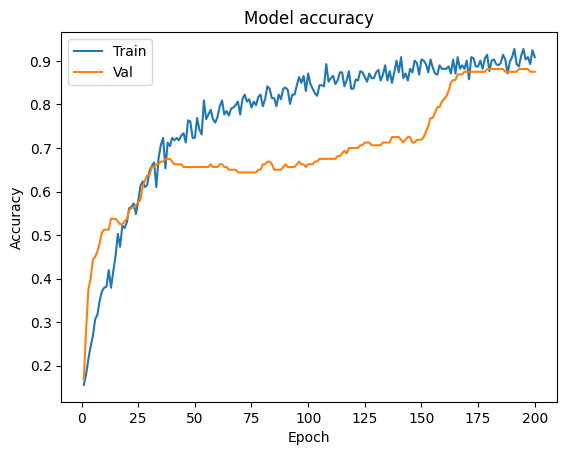

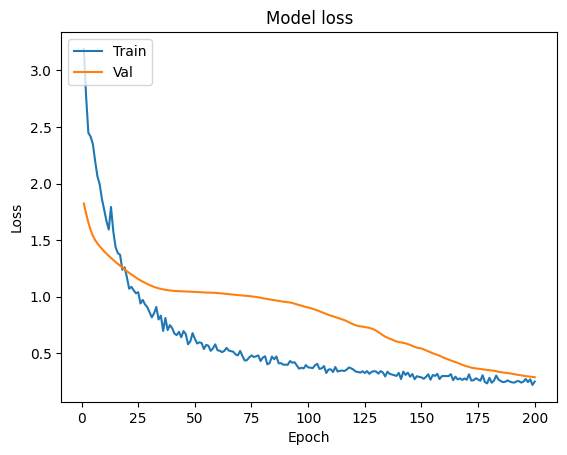

In [ ]:
# 2d
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epochs = len(history.history['accuracy'])
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(ret)

In [ ]:
def make_2d_model():
  model = Sequential()
  model.add(tf.keras.layers.Input(shape=(frame_size,3, 1))) # shape=(80,3)
  model.add(Conv2D(16, (2, 2), activation = 'relu'))
  model.add(Dropout(0.5))

  model.add(Conv2D(32, (2, 2), activation='relu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  return model

In [ ]:
X_train_reshape = np.expand_dims(X_train, axis=-1)
X_test_reshape = np.expand_dims(X_test, axis=-1)
X_train_reshape.shape, X_test_reshape.shape #2d라 차원 하나 추가해줌.

((372, 80, 3, 1), (160, 80, 3, 1))

In [ ]:
#6: train and evaluate the model
model = make_2d_model()

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Quantity to be monitored.
    min_delta = 0.001,   # Minimum change in the monitored quantity to qualify as an improvement,
    patience=20,          # Number of epochs with no improvement
    verbose=2,
    mode = 'auto',       #'min','max', 'auto'
    ) 

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(X_train_reshape, y_train, epochs=200, batch_size=200,
               validation_data = (X_test_reshape, y_test), verbose=2, callbacks=[callback])  # validation_split=0.2
train_loss, train_acc = model.evaluate(X_train_reshape, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test_reshape,  y_test, verbose=2)

Epoch 1/200
2/2 - 2s - loss: 2.8078 - accuracy: 0.1559 - val_loss: 1.6942 - val_accuracy: 0.2375 - 2s/epoch - 1s/step
Epoch 2/200
2/2 - 0s - loss: 2.3741 - accuracy: 0.2581 - val_loss: 1.6163 - val_accuracy: 0.2188 - 121ms/epoch - 61ms/step
Epoch 3/200
2/2 - 0s - loss: 1.9286 - accuracy: 0.3548 - val_loss: 1.5844 - val_accuracy: 0.1688 - 148ms/epoch - 74ms/step
Epoch 4/200
2/2 - 0s - loss: 1.7316 - accuracy: 0.4113 - val_loss: 1.5832 - val_accuracy: 0.1688 - 108ms/epoch - 54ms/step
Epoch 5/200
2/2 - 0s - loss: 1.2927 - accuracy: 0.5457 - val_loss: 1.6009 - val_accuracy: 0.1813 - 128ms/epoch - 64ms/step
Epoch 6/200
2/2 - 0s - loss: 1.2369 - accuracy: 0.5457 - val_loss: 1.6257 - val_accuracy: 0.1937 - 111ms/epoch - 55ms/step
Epoch 7/200
2/2 - 0s - loss: 1.1600 - accuracy: 0.5618 - val_loss: 1.6463 - val_accuracy: 0.2000 - 130ms/epoch - 65ms/step
Epoch 8/200
2/2 - 0s - loss: 0.9695 - accuracy: 0.6237 - val_loss: 1.6588 - val_accuracy: 0.2438 - 124ms/epoch - 62ms/step
Epoch 9/200
2/2 - 0s 

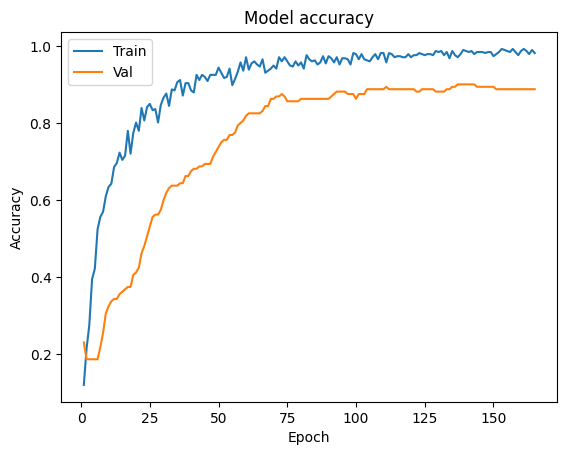

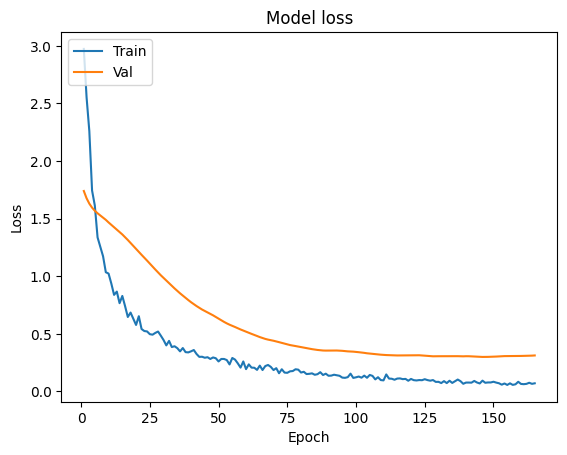

In [ ]:
plot_learningCurve(ret) 
# 옵티마이저와 러닝매이트 좀 조절할 필요가 있어보임. 1d 나쁘지 않음. 하이퍼파라미터 조절 해서 진행해보기